In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_table("processed_log.md", sep=" ")
df.head(df.shape[0])

,Problem,Search,Actions,Expansions,Goal_Tests,New_Nodes,Time_elapsed
0,AirCargoProblem1,breadth_first_search,20,43,56,178,0.051794
1,AirCargoProblem2,breadth_first_search,72,3343,4609,30503,1.132707
2,AirCargoProblem1,depth_first_graph_search,20,21,22,84,0.004280
3,AirCargoProblem2,depth_first_graph_search,72,624,625,5602,1.039489
4,AirCargoProblem1,uniform_cost_search,20,60,62,240,0.027526
5,AirCargoProblem2,uniform_cost_search,72,5154,5156,46618,1.408718
6,AirCargoProblem1,greedy_best_first_graph_searchwithh_unmet_goals,20,7,9,29,0.003466
7,AirCargoProblem2,greedy_best_first_graph_searchwithh_unmet_goals,72,17,19,170,0.061344
8,AirCargoProblem1,greedy_best_first_graph_searchwithh_pg_levelsum,20,6,8,28,1.796423
9,AirCargoProblem2,greedy_best_first_graph_searchwithh_pg_levelsum,72,9,11,86,8.202683


1.Use a table or chart to analyze the number of nodes expanded against number of actions in the domain

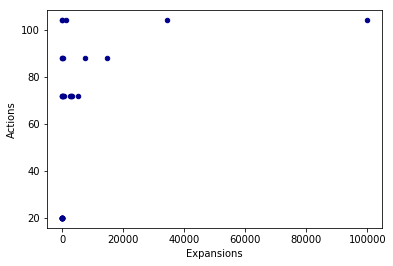

In [14]:
df.plot.scatter(x="Expansions", y="Actions", c='DarkBlue')
plt.show()

2.Use a table or chart to analyze the search time against the number of actions in the domain

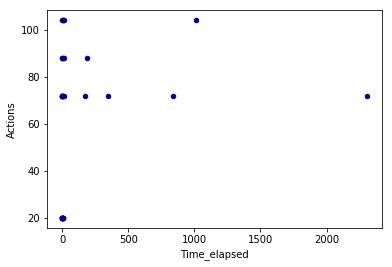

In [15]:
df.plot.scatter(x="Time_elapsed", y="Actions", c='DarkBlue')
plt.show()

3.Use a table or chart to analyze the length of the plans returned by each algorithm on all search problems

In [31]:
df.groupby(["Problem", "Search"]).sum()["Expansions"]

Problem           Search                                         
AirCargoProblem1  astar_searchwithh_pg_levelsum                         28
                  astar_searchwithh_pg_maxlevel                         43
                  astar_searchwithh_pg_setlevel                         46
                  astar_searchwithh_unmet_goals                         50
                  breadth_first_search                                  43
                  depth_first_graph_search                              21
                  greedy_best_first_graph_searchwithh_pg_levelsum        6
                  greedy_best_first_graph_searchwithh_pg_maxlevel        6
                  greedy_best_first_graph_searchwithh_pg_setlevel       13
                  greedy_best_first_graph_searchwithh_unmet_goals        7
                  uniform_cost_search                                   60
AirCargoProblem2  astar_searchwithh_pg_levelsum                        357
                  astar_searchwith

4.Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?
Answer: greedy_best_first_graph_searchwithh_unmet_goals or depth_first_graph_search

In [48]:
df.loc[:,["Problem", "Search", "Time_elapsed"]][df.Problem == df.Problem.min()]

,Problem,Search,Time_elapsed
0,AirCargoProblem1,breadth_first_search,0.051794
2,AirCargoProblem1,depth_first_graph_search,0.004280
4,AirCargoProblem1,uniform_cost_search,0.027526
6,AirCargoProblem1,greedy_best_first_graph_searchwithh_unmet_goals,0.003466
8,AirCargoProblem1,greedy_best_first_graph_searchwithh_pg_levelsum,1.796423
10,AirCargoProblem1,greedy_best_first_graph_searchwithh_pg_maxlevel,0.269534
12,AirCargoProblem1,greedy_best_first_graph_searchwithh_pg_setlevel,2.594392
14,AirCargoProblem1,astar_searchwithh_unmet_goals,0.046223
16,AirCargoProblem1,astar_searchwithh_pg_levelsum,0.979195
18,AirCargoProblem1,astar_searchwithh_pg_maxlevel,0.813571


5.Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)

6.Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?